<a href="https://colab.research.google.com/github/DayDreamChaser/torch-action/blob/main/BERT%E2%80%94%E2%80%94transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BERTÊñáÊú¨ÂàÜÁ±ª

‰ªªÂä°ÔºöÂæÆË∞ÉBERTÊù•Â§ÑÁêÜÊñáÊú¨ÊÉÖÊÑüÂàÜÁ±ª‰ªªÂä°

Êï∞ÊçÆÈõÜÔºöÁæéÂõ¢Â§ñÂçñÁöÑÁî®Êà∑ËØÑËÆ∫Êï∞ÊçÆÈõÜ

ÁõÆÊ†áÔºöÊääËØÑËÆ∫ÂàÜÊàêÔºåÂ•ΩËØÑ(Ê†áÁ≠æ‰∏∫1) Âíå Â∑ÆËØÑ(Ê†áÁ≠æ‰∏∫0)

In [1]:
#ÂÆâË£ÖÂ∫ì
# !pip install datasets
# !pip install transformers[torch]
# !pip install torchkeras

## ‰∏ÄÔºåÂáÜÂ§áÊï∞ÊçÆ

ÂáÜÂ§áÊï∞ÊçÆÈò∂ÊÆµ‰∏ªË¶ÅÈúÄË¶ÅÁî®Âà∞ÁöÑÊòØdatasets.Dataset Âíåtransformers.AutoTokenizer„ÄÇ


### 1ÔºåÊï∞ÊçÆÂä†ËΩΩ

HuggingFaceÁöÑdatasetsÂ∫ìÊèê‰æõ‰∫ÜDatasetÁöÑÂäüËÉΩ„ÄÇ

In [2]:
import numpy as np
import pandas as pd
import datasets

import torch
from torch.utils.data import DataLoader

In [3]:
import urllib.request
import os

url_base = 'https://raw.githubusercontent.com/SophonPlus/ChineseNlpCorpus/master/datasets/waimai_10k/'
key_file = 'waimai_10k.csv'
dataset_dir = "data"


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")

_download(key_file)

In [4]:
df = pd.read_csv("data/waimai_10k.csv")
df = df.rename(columns={"label":"labels"})

In [5]:
df.loc[0]

labels               1
review    ÂæàÂø´ÔºåÂ•ΩÂêÉÔºåÂë≥ÈÅìË∂≥ÔºåÈáèÂ§ß
Name: 0, dtype: object

In [6]:
df.head(10)

labels                                review
0       1                          ÂæàÂø´ÔºåÂ•ΩÂêÉÔºåÂë≥ÈÅìË∂≥ÔºåÈáèÂ§ß
1       1                          Ê≤°ÊúâÈÄÅÊ∞¥Ê≤°ÊúâÈÄÅÊ∞¥Ê≤°ÊúâÈÄÅÊ∞¥
2       1                              ÈùûÂ∏∏Âø´ÔºåÊÄÅÂ∫¶Â•Ω„ÄÇ
3       1                       Êñπ‰æøÔºåÂø´Êç∑ÔºåÂë≥ÈÅìÂèØÂè£ÔºåÂø´ÈÄíÁªôÂäõ
4       1                          ËèúÂë≥ÈÅìÂæàÊ£íÔºÅÈÄÅÈ§êÂæàÂèäÊó∂ÔºÅ
5       1                     ‰ªäÂ§©Â∏àÂÇÖÊòØ‰∏çÊòØÊâãÊäñ‰∫ÜÔºåÂæÆËæ£Ê†ºÂ§ñËæ£ÔºÅ
6       1                      ÈÄÅÈ§êÂø´,ÊÄÅÂ∫¶‰πüÁâπÂà´Â•Ω,ËæõËã¶Âï¶Ë∞¢Ë∞¢
7       1  Ë∂ÖÁ∫ßÂø´Â∞±ÈÄÅÂà∞‰∫ÜÔºåËøô‰πàÂÜ∑ÁöÑÂ§©Ê∞îÈ™ëÂ£´‰ª¨ËæõËã¶‰∫Ü„ÄÇË∞¢Ë∞¢‰Ω†‰ª¨„ÄÇÈ∫ªËæ£È¶ôÈîÖ‰æùÁÑ∂ÂæàÂ•ΩÂêÉ„ÄÇ
8       1            ÁªèËøá‰∏äÊ¨°Êôö‰∫Ü2Â∞èÊó∂ÔºåËøôÊ¨°Ë∂ÖÁ∫ßÂø´Ôºå20ÂàÜÈíüÂ∞±ÈÄÅÂà∞‰∫Ü‚Ä¶‚Ä¶
9       1                  ÊúÄÂêé‰∫îÂàÜÈíüËÆ¢ÁöÑÔºåÂçñÂÆ∂ÁâπÂà´Â•ΩÊé•Âçï‰∫ÜÔºåË∞¢Ë∞¢„ÄÇ

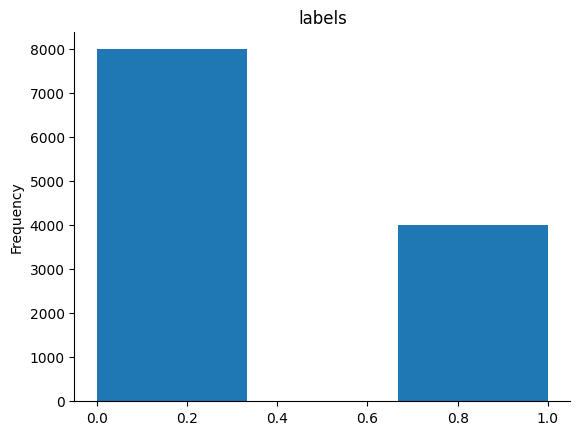

In [7]:
# @title label
from matplotlib import pyplot as plt
df['labels'].plot(kind='hist', bins=3, title='labels')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
df['len'] = df['review'].apply(len)
df['len'].describe()

count    11987.000000
mean        25.048553
std         24.680028
min          5.000000
25%         11.000000
50%         17.000000
75%         30.000000
max        463.000000
Name: len, dtype: float64

Âπ≥ÂùáÈïøÂ∫¶25.05Ôºå ‰∏≠‰ΩçÊï∞17Ôºå ‰∏äÂõõÂàÜ‰Ωç30ÔºåÊúÄÂ§ß463
ÂèñÊúÄÂ§ßÈïøÂ∫¶50Êà™Êñ≠

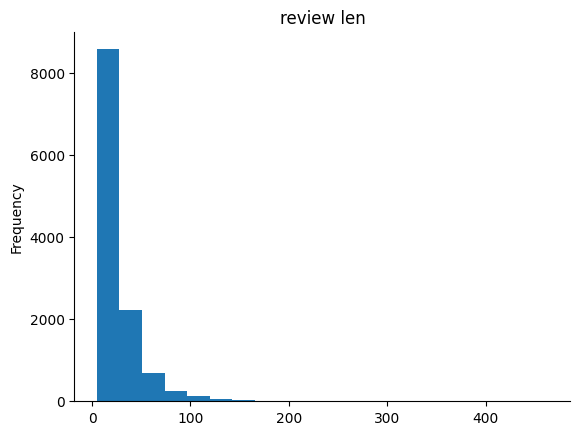

In [9]:
df['len'].plot(kind='hist', bins=20, title='review len')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
df[10:20]["review"]

10                ÈáèÂ§ßÔºåÂ•ΩÂêÉÔºåÊØèÊ¨°ÁÇπÁöÑÈÉΩÂ§üÂêÉ‰∏§Ê¨°
11                     Êå∫Ëæ£ÁöÑÔºåÂêÉÁùÄËøòÂèØ‰ª•Âêß
12                    Âë≥ÈÅìÂ•ΩÔºåÈÄÅÈ§êÂø´ÔºåÂàÜÈáèË∂≥
13                     ÈáèË∂≥ÔºåÂ•ΩÂêÉÔºåÈÄÅÈ§ê‰πüÂø´
14         ÁâπÂà´Â•ΩÂêÉÔºåÈáèÁâπÂ§ßÔºåËÄå‰∏îÈÄÅÈ§êÁâπÂà´Âø´ÔºåÁâπÂà´ÁâπÂà´Ê£í
15                     Âè£ÊÑüÂ•ΩÁöÑÂæàÔºåÈÄüÂ∫¶Âø´ÔºÅ
16           Áõ∏ÂΩìÂ•ΩÂêÉÁöÑÈ¶ôÈîÖÔºåÂàÜÈáèÂ§üË∂≥ÔºåÂë≥ÈÅì‰πüÊ≤°ÁöÑËØ¥„ÄÇ
17    Â•ΩÂêÉÔºÅÈÄüÂ∫¶ÔºÅÂåÖË£Ö‰πüÊúâÂìÅË¥®Ôºå‰∏çÂá∫ÂÆ∂Èó®Â∞±ËÉΩÂêÉÂà∞È§êÂéÖÁöÑÂë≥ÈÅìÔºÅ
18                Âë≥ÈÅìÂ•ΩÊûÅÂï¶ÔºåÈÄÅÈ§êÂæàÂø´Â∏àÂÇÖËæõËã¶Âï¶
19                  ÈáèÂ§ßÂë≥ÈÅìÂ•ΩÔºåÈÄÅÈ§êÂ∏àÂÇÖÈÉΩÂæàÂ•Ω
Name: review, dtype: object

<Axes: title={'center': 'labels'}, ylabel='Frequency'>

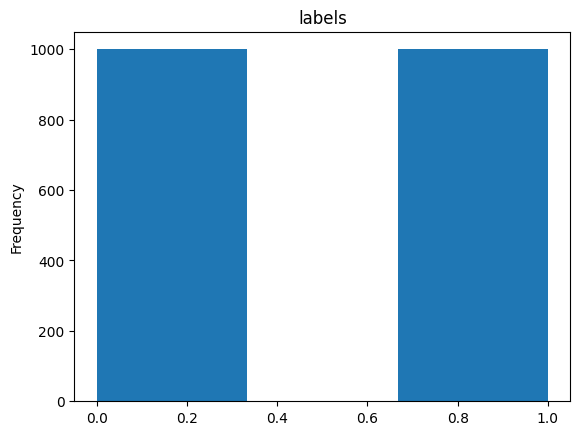

In [11]:
neg_df = df[df['labels']==0]
pos_df = df[df['labels']==1]

pos_df = pos_df.sample(n=1000, random_state=200)  # 1000Êù°
neg_df = neg_df.sample(n=1000, random_state=200)  # 1000Êù°
df = pd.concat([neg_df, pos_df], axis=0)

df['labels'].plot(kind='hist', bins=3, title='labels')

In [12]:
ds = datasets.Dataset.from_pandas(df)
ds

Dataset({
    features: ['labels', 'review', 'len', '__index_level_0__'],
    num_rows: 2000
})

### 2ÔºåÊñáÊú¨ÂàÜËØç

transformersÂ∫ì‰ΩøÁî®tokenizerËøõË°åÊñáÊú¨ÂàÜËØç„ÄÇ


In [13]:
from transformers import AutoTokenizer #BertTokenizer

model_id = "hfl/chinese-roberta-wwm-ext-large"
tokenizer = AutoTokenizer.from_pretrained(model_id) #ÈúÄË¶ÅÂíåÊ®°Âûã‰∏ÄËá¥
print(tokenizer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


BertTokenizerFast(name_or_path='hfl/chinese-roberta-wwm-ext-large', vocab_size=21128, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}


In [22]:
#tokenizerÂèØ‰ª•‰ΩøÁî® __call__,encode,encode_plus,batch_encode_plusÁ≠âÊñπÊ≥ïÁºñÁ†Å
#ÂèØ‰ª•‰ΩøÁî®decode,batch_decodeÁ≠âÊñπÊ≥ïËøõË°åËß£Á†Å
sample_txt = ds['review'][0]
print(sample_txt)
text_codes = tokenizer(text=sample_txt,
                       text_pair = None,
                       max_length = 100,
                       truncation = True,
                       padding= 'do_not_pad') #ÂèØÈÄâ'longest','max_length','do_not_pad'

#input_idsÊòØÁºñÁ†ÅÂêéÁöÑÊï∞Â≠óÔºåtoken_type_idsË°®Á§∫Êù•Ëá™Á¨¨1‰∏™Âè•Â≠êËøòÊòØÁ¨¨2‰∏™Âè•Â≠ê
#attention_maskÂú®paddingÁöÑ‰ΩçÁΩÆÊòØ0ÂÖ∂ÂÆÉ‰ΩçÁΩÆÊòØ1
print(text_codes)

‰∏ÄÂÆö‰∏çË¶ÅÁÇπÁÇíÈù¢,2Â∞èÊó∂Áªà‰∫éÂù®Êàê‰∫ÜÁü≥Â§¥
{'input_ids': [101, 671, 2137, 679, 6206, 4157, 4143, 7481, 117, 123, 2207, 3198, 5303, 754, 1789, 2768, 749, 4767, 1928, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [15]:
print(tokenizer.decode(text_codes["input_ids"][0]))
print(tokenizer.decode(text_codes["input_ids"][-1]))

[CLS]
[SEP]


In [24]:
tokenizer.batch_decode(text_codes["input_ids"])

['[CLS]',
 '‰∏Ä',
 'ÂÆö',
 '‰∏ç',
 'Ë¶Å',
 'ÁÇπ',
 'ÁÇí',
 'Èù¢',
 ',',
 '2',
 'Â∞è',
 'Êó∂',
 'Áªà',
 '‰∫é',
 'Âù®',
 'Êàê',
 '‰∫Ü',
 'Áü≥',
 'Â§¥',
 '[SEP]']

In [25]:
tokens = tokenizer.tokenize(sample_txt)
print("tokens=",tokens)

ids = tokenizer.convert_tokens_to_ids(tokens)
print("ids = ",ids)

tokens= ['‰∏Ä', 'ÂÆö', '‰∏ç', 'Ë¶Å', 'ÁÇπ', 'ÁÇí', 'Èù¢', ',', '2', 'Â∞è', 'Êó∂', 'Áªà', '‰∫é', 'Âù®', 'Êàê', '‰∫Ü', 'Áü≥', 'Â§¥']
ids =  [671, 2137, 679, 6206, 4157, 4143, 7481, 117, 123, 2207, 3198, 5303, 754, 1789, 2768, 749, 4767, 1928]


### 3Ôºå‰º†ÂÖ•DataLoader

In [26]:
# ËøõË°åÊâπÈáèTokenize
ds_encoded = ds.map(lambda x:tokenizer(x["review"], max_length=50, truncation=True, padding='max_length'),
                    batched=True,
                    batch_size=16,
                    num_proc=4) #ÊîØÊåÅÊâπÂ§ÑÁêÜÂíåÂ§öËøõÁ®ãmap

Map (num_proc=4):   0%|          | 0/2000 [00:00<?, ? examples/s]

In [27]:
#ËΩ¨Êç¢Êàêpytorch‰∏≠ÁöÑtensor
ds_encoded.set_format(type="torch",
           columns = ["input_ids",'attention_mask','token_type_ids','labels'])

#ds_encoded.reset_format()
ds_encoded[0]

{'labels': tensor(0),
 'input_ids': tensor([ 101,  671, 2137,  679, 6206, 4157, 4143, 7481,  117,  123, 2207, 3198,
         5303,  754, 1789, 2768,  749, 4767, 1928,  102,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0]),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0])}

In [28]:
#ÂàÜÂâ≤ÊàêËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
ds_train_val, ds_test = ds_encoded.train_test_split(test_size=0.2).values()
ds_train, ds_val = ds_train_val.train_test_split(test_size=0.2).values()

print(ds_train, ds_val, ds_test)

Dataset({
    features: ['labels', 'review', 'len', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1280
}) Dataset({
    features: ['labels', 'review', 'len', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 320
}) Dataset({
    features: ['labels', 'review', 'len', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 400
})


In [30]:
#Âú®collate_fn‰∏≠ÂèØ‰ª•ÂÅöÂä®ÊÄÅÊâπÂ§ÑÁêÜ(dynamic batching)
def collate_fn(examples):
    return tokenizer.pad(examples) #return_tensors='pt'

#‰ª•‰∏ãÊñπÂºèÁ≠â‰ª∑
#from transformers import DataCollatorWithPadding
#collate_fn = DataCollatorWithPadding(tokenizer=tokenizer)

batch_size = 32
dl_train = torch.utils.data.DataLoader(ds_train, batch_size=batch_size, collate_fn = collate_fn)
dl_val = torch.utils.data.DataLoader(ds_val, batch_size=batch_size,  collate_fn = collate_fn)
dl_test = torch.utils.data.DataLoader(ds_test, batch_size=batch_size,  collate_fn = collate_fn)

In [32]:
for batch in dl_train:
  print(batch)
  break

{'labels': tensor([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1]), 'input_ids': tensor([[ 101, 4343, 5489,  ...,    0,    0,    0],
        [ 101, 3739, 6963,  ...,    0,    0,    0],
        [ 101, 7883, 5597,  ...,    0,    0,    0],
        ...,
        [ 101, 4636, 2428,  ...,  679,  671,  102],
        [ 101,  671,  819,  ...,    0,    0,    0],
        [ 101, 1348, 2563,  ...,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


## ‰∫åÔºåÂÆö‰πâÊ®°Âûã

‰∏Ä‰∏™ÂÆåÊï¥ÁöÑÊ®°Âûã(Model)ÂåÖÊã¨Ê®°ÂûãÊû∂ÊûÑ(Architecture)ÂíåÊ®°ÂûãÊùÉÈáç(Checkpoints/Weights)„ÄÇ

transformersÊèê‰æõ‰∫Ü3ÁßçÊåáÂÆöÊ®°ÂûãÊû∂ÊûÑÁöÑÊñπÊ≥ï„ÄÇ

* Á¨¨1ÁßçÊòØÊåáÂÆöÊ®°ÂûãÊû∂ÊûÑ(Â¶Ç: from transformers import BertModel)

* Á¨¨2ÁßçÊòØËá™Âä®Êé®Êñ≠Ê®°ÂûãÊû∂ÊûÑ(Â¶Ç: from transformers import AutoModel)

* Á¨¨3ÁßçÊòØËá™Âä®Êé®Êñ≠Ê®°ÂûãÊû∂ÊûÑÂπ∂Ëá™Âä®Ê∑ªÂä†Head (Â¶Ç: from transformers import AutoModelForSequenceClassification )

Á¨¨1ÁßçÊñπÊ°àÂíåÁ¨¨2ÁßçÊñπÊ°àÁî®Êà∑ÂèØ‰ª•ÁÅµÊ¥ªÂú∞Ê†πÊçÆËá™Â∑±Ë¶ÅÂÅöÁöÑ‰ªªÂä°ËÆæËÆ°HeadÔºåÂπ∂‰∏îÈúÄË¶ÅÂØπÂü∫Á°ÄÊ®°ÂûãÊúâ‰∏ÄÂÆöÁöÑ‰∫ÜËß£„ÄÇ


Ê≠§Â§ÑÊàë‰ª¨‰ΩøÁî®Á¨¨3ÁßçÊñπÊ°à„ÄÇ


In [33]:
from transformers import AutoModelForSequenceClassification

#Âä†ËΩΩÊ®°Âûã (‰ºöÊ∑ªÂä†ÈíàÂØπÁâπÂÆö‰ªªÂä°Á±ªÂûãÁöÑHead)
model = AutoModelForSequenceClassification.from_pretrained(model_id, num_labels=2)

dict(model.named_children()).keys()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at hfl/chinese-roberta-wwm-ext-large and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


dict_keys(['bert', 'dropout', 'classifier'])

In [34]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(21128, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,

In [35]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Êàë‰ª¨ÂèØ‰ª•Áî®‰∏Ä‰∏™batchÁöÑÊï∞ÊçÆÂéªËØïÁÆó‰∏Ä‰∏ã

In [37]:
model = model.to(device)
output = model(**batch.to(device))

In [38]:
output.loss

tensor(0.6930, device='cuda:0', grad_fn=<NllLossBackward0>)

In [39]:
output

SequenceClassifierOutput(loss=tensor(0.6930, device='cuda:0', grad_fn=<NllLossBackward0>), logits=tensor([[ 0.2274,  0.0879],
        [ 0.2534, -0.0826],
        [ 0.2366,  0.1563],
        [ 0.3862,  0.0725],
        [ 0.1837,  0.1254],
        [ 0.2206, -0.1636],
        [ 0.3930,  0.0513],
        [ 0.3388, -0.1072],
        [ 0.2994, -0.0508],
        [ 0.2531, -0.0265],
        [ 0.4523,  0.0403],
        [ 0.2359,  0.1121],
        [ 0.4592, -0.0588],
        [ 0.2201, -0.0724],
        [ 0.2708,  0.1066],
        [ 0.3107, -0.0762],
        [ 0.1405,  0.1901],
        [ 0.2418,  0.0127],
        [ 0.2504,  0.1760],
        [ 0.3721,  0.2222],
        [ 0.2607, -0.0076],
        [ 0.3155,  0.0731],
        [ 0.1676,  0.0458],
        [ 0.1966, -0.1905],
        [ 0.2911,  0.1291],
        [ 0.2567,  0.1316],
        [ 0.3107,  0.0167],
        [ 0.2838,  0.0387],
        [ 0.4149,  0.0059],
        [ 0.1522,  0.0682],
        [ 0.2589,  0.1399],
        [ 0.1181, -0.2881]], devic

## ‰∏âÔºåËÆ≠ÁªÉÊ®°Âûã

In [ ]:
!pip install accelerate

‰∏ãÈù¢‰ΩøÁî®Êàë‰ª¨ÁöÑÊ¢¶‰∏≠ÊÉÖÁÇâ torchkeras Êù•ÂÆûÁé∞ÊúÄ‰ºòÈõÖÁöÑÂæÆË∞ÉËÆ≠ÁªÉÂæ™ÁéØ„ÄÇü§óü§ó



In [40]:
from torchkeras import KerasModel

#Êàë‰ª¨ÈúÄË¶Å‰øÆÊîπStepRunner‰ª•ÈÄÇÂ∫îtransformersÁöÑÊï∞ÊçÆÈõÜÊ†ºÂºè

class StepRunner:
    def __init__(self, net, loss_fn, accelerator, stage = "train", metrics_dict = None,
                 optimizer = None, lr_scheduler = None
                 ):
        self.net,self.loss_fn,self.metrics_dict,self.stage = net,loss_fn,metrics_dict,stage
        self.optimizer,self.lr_scheduler = optimizer,lr_scheduler
        self.accelerator = accelerator
        if self.stage=='train':
            self.net.train()
        else:
            self.net.eval()

    def __call__(self, batch):

        out = self.net(**batch.to(device))

        #loss
        loss = out.loss

        #preds
        preds =(out.logits).argmax(axis=1)

        #backward()
        if self.optimizer is not None and self.stage=="train":
            self.accelerator.backward(loss)
            self.optimizer.step()
            if self.lr_scheduler is not None:
                self.lr_scheduler.step()
            self.optimizer.zero_grad()

        all_loss = self.accelerator.gather(loss).sum()

        labels = batch['labels']
        acc = (preds==labels).sum()/((labels>-1).sum())

        all_acc = self.accelerator.gather(acc).mean()

        #losses
        step_losses = {self.stage+"_loss":all_loss.item(), self.stage+'_acc':all_acc.item()}

        #metrics
        step_metrics = {}

        if self.stage=="train":
            if self.optimizer is not None:
                step_metrics['lr'] = self.optimizer.state_dict()['param_groups'][0]['lr']
            else:
                step_metrics['lr'] = 0.0
        return step_losses,step_metrics

KerasModel.StepRunner = StepRunner

In [41]:
model = model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=3e-5)
keras_model = KerasModel(model,loss_fn=None,optimizer = optimizer)

<<<<<< ‚ö°Ô∏è cuda is used >>>>>>


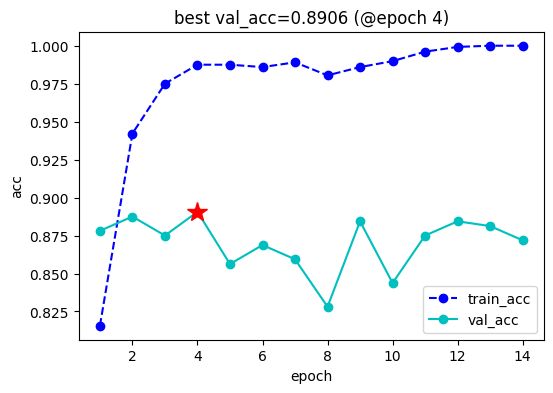

<<<<<< val_acc without improvement in 10 epoch,early stopping >>>>>> 



epoch  train_loss  train_acc       lr  val_loss   val_acc
0       1    0.400042   0.815625  0.00003  0.298466  0.878125
1       2    0.178673   0.942187  0.00003  0.293229  0.887500
2       3    0.079503   0.975000  0.00003  0.435754  0.875000
3       4    0.047774   0.987500  0.00003  0.483032  0.890625
4       5    0.030902   0.987500  0.00003  0.593966  0.856250
5       6    0.044966   0.985938  0.00003  0.639174  0.868750
6       7    0.044582   0.989062  0.00003  0.647959  0.859375
7       8    0.073322   0.980469  0.00003  0.604683  0.828125
8       9    0.040865   0.985938  0.00003  0.535952  0.884375
9      10    0.036645   0.989844  0.00003  0.567870  0.843750
10     11    0.014979   0.996094  0.00003  0.616570  0.875000
11     12    0.003719   0.999219  0.00003  0.646139  0.884375
12     13    0.000601   1.000000  0.00003  0.699452  0.881250
13     14    0.000337   1.000000  0.00003  0.739432  0.871875

In [42]:
keras_model.fit(
    train_data = dl_train,
    val_data= dl_val,
    ckpt_path='bert_waimai.pt',
    epochs=20,
    patience=10,
    monitor="val_acc",
    mode="max",
    plot = True,
    wandb = False,
    quiet = True
)


## ÂõõÔºåËØÑ‰º∞Ê®°Âûã

ÂèØ‰ª•‰ΩøÁî®huggingFaceÁöÑevaluateÂ∫ìÊù•ËøõË°åÊ®°ÂûãËØÑ‰º∞„ÄÇ

ÈÄöËøáevaluateÁöÑloadÊñπÊ≥ïÂèØ‰ª•Âä†ËΩΩ‰∏Ä‰∫õÂ∏∏Áî®ÁöÑËØÑ‰º∞ÊåáÊ†á„ÄÇ

ÂèØ‰ª•Áî®add_batchÈÄêÊâπÊ¨°Âú∞ÂæÄËøô‰∫õËØÑ‰º∞ÊåáÊ†á‰∏äÊ∑ªÂä†Êï∞ÊçÆÔºåÊúÄÂêéÁî®computeËÆ°ÁÆóËØÑ‰º∞ÁªìÊûú„ÄÇ

In [43]:
!pip install evaluate

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.1/84.1 kB 3.0 MB/s eta 0:00:00


In [46]:
import evaluate
metric = evaluate.load("accuracy")
model.eval()
model = model.to(device)

dl_test = keras_model.accelerator.prepare(dl_test)
for batch in dl_test:
    with torch.no_grad():
        outputs = model(**batch.to(device))

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    metric.add_batch(predictions=predictions, references=batch["labels"])

metric.compute()

{'accuracy': 0.8975}

## ‰∫îÔºå‰ΩøÁî®Ê®°Âûã

In [47]:
texts = ["‰ªäÂ§©Â∏àÂÇÖÊòØ‰∏çÊòØÊâãÊäñ‰∫ÜÔºåÂæÆËæ£Ê†ºÂ§ñËæ£ ","Ëøô‰ªñÂ¶à‰πüÂ§™ÈöæÂêÉ‰∫ÜÂêß","Ê≤°ÊúâÈÄÅÊ∞¥Ê≤°ÊúâÈÄÅÊ∞¥Ê≤°ÊúâÈÄÅÊ∞¥","ËøòË°åÂêß"]
batch = tokenizer(texts, padding=True, return_tensors="pt")
batch = {k:v.to(keras_model.accelerator.device) for k,v in batch.items()}

In [48]:
from torch import nn
logits = model(**batch).logits
scores = nn.Softmax(dim=-1)(logits)[:,-1]
print(scores)
#ÂèØ‰ª•ÁúãÂà∞ÂæóÂàÜ‰∏é‰∫∫ÁöÑÈ¢ÑÊúüÊòØÈ´òÂ∫¶‰∏ÄËá¥ÁöÑ

tensor([2.2612e-02, 7.8786e-04, 5.4986e-04, 9.7478e-01], device='cuda:0',
       grad_fn=<SelectBackward0>)


‰πüÂèØ‰ª•Áî®pipelineÊäätokenizerÂíåmodelÁªÑË£ÖÂú®‰∏ÄËµ∑

In [49]:
from transformers import pipeline
classifier = pipeline(task="text-classification", tokenizer=tokenizer, model=model.cpu())
classifier("Êå∫Â•ΩÂêÉÁöÑÂì¶")

[{'label': 'LABEL_1', 'score': 0.9840770959854126}]

## ÂÖ≠Ôºå‰øùÂ≠òÊ®°Âûã

‰øùÂ≠òmodelÂíåtokenizer‰πãÂêéÔºåÊàë‰ª¨ÂèØ‰ª•Áî®‰∏Ä‰∏™pipelineÂä†ËΩΩÔºåÂπ∂ËøõË°åÊâπÈáèÈ¢ÑÊµã„ÄÇ


In [50]:
model.config.id2label = {0:"Â∑ÆËØÑ",1:"Â•ΩËØÑ"}
model.save_pretrained("waimai_10k_bert")
tokenizer.save_pretrained("waimai_10k_bert")

('waimai_10k_bert/tokenizer_config.json',
 'waimai_10k_bert/special_tokens_map.json',
 'waimai_10k_bert/vocab.txt',
 'waimai_10k_bert/added_tokens.json',
 'waimai_10k_bert/tokenizer.json')

In [51]:
from transformers import pipeline
classifier = pipeline("text-classification",model="waimai_10k_bert")


In [52]:
classifier(["Âë≥ÈÅìËøò‰∏çÈîôÔºå‰∏ãÊ¨°ÂÜçÊù•","ÊàëÂéªÔºåÂêÉ‰∫ÜÊàëÂêê‰∫Ü‰∏âÂ§©"])

[{'label': 'Â•ΩËØÑ', 'score': 0.9777551293373108},
 {'label': 'Â∑ÆËØÑ', 'score': 0.9994437098503113}]

In [53]:
classifier(["Áî®Êà∑Ôºö‰Ω†Â•ΩÔºåÊàëÊÉ≥‰π∞ÁÇπÁêÜË¥¢","ÊÉ≥ÈºìÂä±‰∏Ä‰∏ã‰ΩúËÄÖÊùÄ‰∫∫"])

[{'label': 'Â•ΩËØÑ', 'score': 0.9777470231056213},
 {'label': 'Â∑ÆËØÑ', 'score': 0.8687992691993713}]